## Testinng jupyter notebook


In [2]:
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.result import Result
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
from qiskit_aer.backends import AerSimulator, StatevectorSimulator, statevector_simulator

### Data prepration


Loading Iris dataset...
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Dataset shape: (100, 4)
Target distribution: [50 50]
(100, 4)
(100,)

Preprocessing data...
Using 2 features: (100, 2)
Training set: 70 samples
Test set: 30 samples


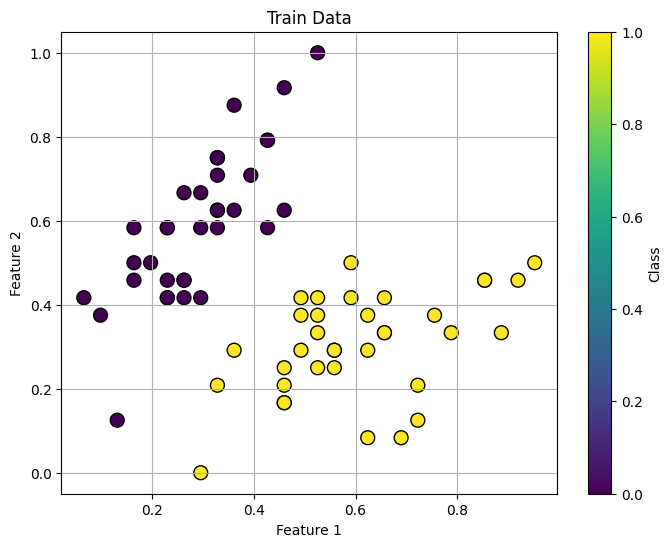

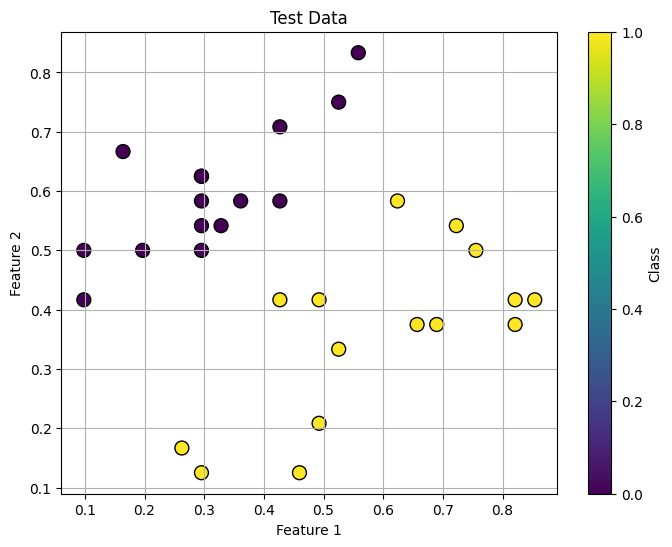

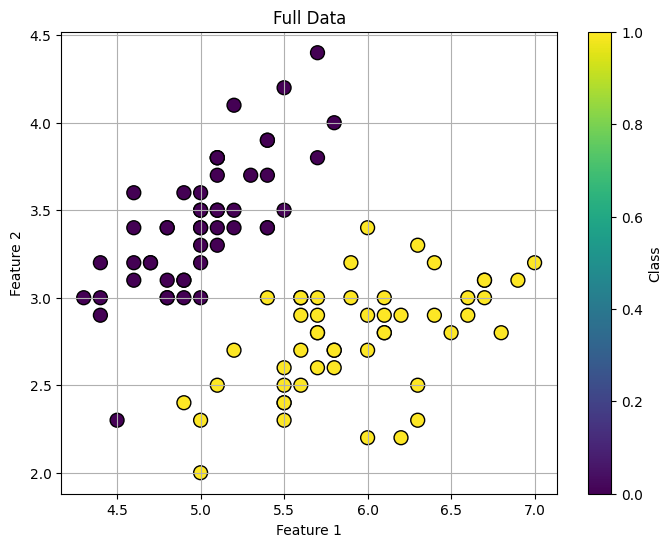

In [3]:
from quantum_computing.p2.utils.data_prepperation import (
    load_iris_binary,
    preprocess_data,
)

from quantum_computing.p2.utils.visualization import plot_data

X , y = load_iris_binary()

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = preprocess_data(X, y)

plot_data(X_train, y_train, title="Train Data")
plot_data(X_test, y_test, title="Test Data")
plot_data(X, y, title="Full Data")

### Data Encoding

In [4]:
from quantum_computing.p2.qml.encoders import AngleEncoder, HadRotZRotZZEncoder

from quantum_computing.p2.qml.quantum_model import QuantumCircuit


# Simple Encoder
qc = QuantumCircuit(2, 1)
encoder = AngleEncoder()
had_rotz_encoded_circuit : QuantumCircuit = encoder.encode(qc, X_train[0])
print(had_rotz_encoded_circuit)



# Advanced Encoder
qc2 = QuantumCircuit(2, 1)
encoder2 = HadRotZRotZZEncoder()
had_rotz_rotzz_encoded_circuit = encoder2.encode(qc2, X_train[69])

print(had_rotz_rotzz_encoded_circuit)




     ┌───┐┌────────────┐
q_0: ┤ H ├┤ Ry(5.3659) ├
     ├───┤├────────────┤
q_1: ┤ H ├┤ Ry(11π/12) ├
     └───┘└────────────┘
c: 1/═══════════════════
                        
     ┌───┐┌────────────┐                         
q_0: ┤ H ├┤ Rz(1.8563) ├──■───────────────────■──
     ├───┤└┬──────────┬┘┌─┴─┐┌─────────────┐┌─┴─┐
q_1: ┤ H ├─┤ Rz(5π/6) ├─┤ X ├┤ Rz(0.77348) ├┤ X ├
     └───┘ └──────────┘ └───┘└─────────────┘└───┘
c: 1/════════════════════════════════════════════
                                                 


### Measurement

In [5]:
had_rotz_encoded_circuit.measure(0, 0)
print(had_rotz_encoded_circuit)

simulator = AerSimulator()
transpiled_circuit = transpile(had_rotz_encoded_circuit, simulator)

     ┌───┐┌────────────┐┌─┐
q_0: ┤ H ├┤ Ry(5.3659) ├┤M├
     ├───┤├────────────┤└╥┘
q_1: ┤ H ├┤ Ry(11π/12) ├─╫─
     └───┘└────────────┘ ║ 
c: 1/════════════════════╩═
                         0 


{'0': 931, '1': 93}


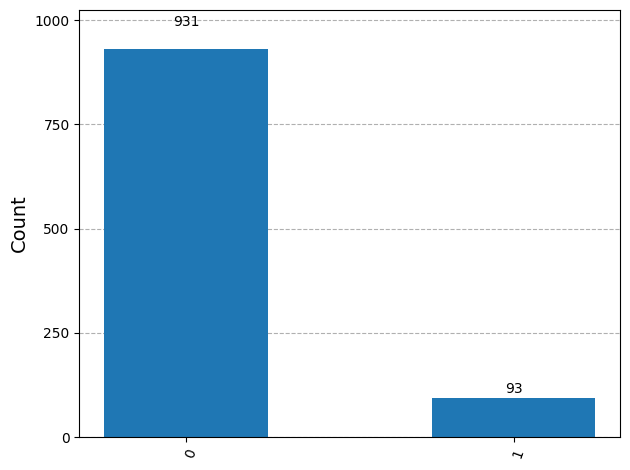

In [6]:
job = simulator.run(transpiled_circuit, shots=1024)
result: Result = job.result()
counts = result.get_counts(transpiled_circuit)
print(counts)
plot_histogram(counts)



Statevector([ 0.60876143+0.00000000e+00j,  0.        +0.00000000e+00j,
             -0.79335334-9.71577629e-17j,  0.        -0.00000000e+00j],
            dims=(2, 2))


c:\Users\javid.rezai\AppData\Local\anaconda3\envs\quantum-computing\Lib\site-packages\numpy\ma\core.py:2892: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\javid.rezai\AppData\Local\anaconda3\envs\quantum-computing\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\javid.rezai\AppData\Local\anaconda3\envs\quantum-computing\Lib\site-packages\matplotlib\transforms.py:1853: ComplexWarning: Casting complex values to real discards the imaginary part
  return affine_transform(values, mtx)


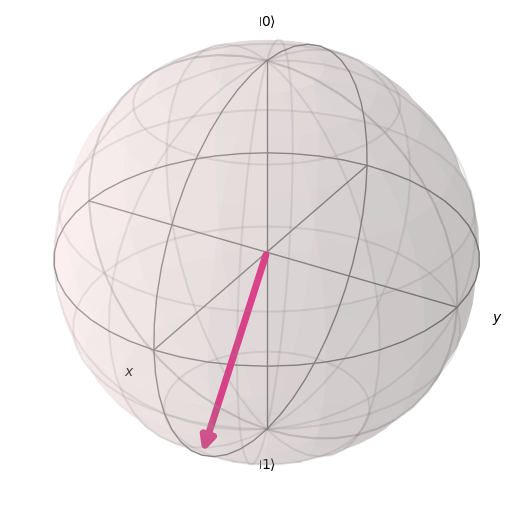

In [7]:



backend = Aer.get_backend('statevector_simulator')
result = backend.run(transpiled_circuit).result()
statevector = result.get_statevector(transpiled_circuit)
print(statevector)

plot_bloch_vector(statevector)


### Preparing ansatz

In [8]:
from quantum_computing.p2.qml.ansatzes import (SimpleAnsatz,AdvancedAnsatz)
from quantum_computing.p2.qml.initializers import RandomInitializer


layers = 1
num_qubits = 2

initializer1 = RandomInitializer()


print("SimpleAnsatz: Layers:", layers, "Num Qubits:", num_qubits)
simple_ansatz_initial_params = initializer1.initialize(layers* num_qubits)
ansatz = SimpleAnsatz(layers)

qc1 = QuantumCircuit(num_qubits, 1)
ansatz_circuit = ansatz.apply(qc1, simple_ansatz_initial_params)
print(ansatz_circuit)

print("==" * 30)
print("AdvancedAnsatz: Layers:", layers, "Num Qubits:", num_qubits)

advanced_ansatz_params = initializer1.initialize(2* num_qubits*layers)
advanced_ansatz = AdvancedAnsatz(layers)
qc2 = QuantumCircuit(num_qubits, 1)
advanced_ansatz_circuit = advanced_ansatz.apply(qc2, advanced_ansatz_params)
print(advanced_ansatz_circuit)


SimpleAnsatz: Layers: 1 Num Qubits: 2
     ┌────────────┐     
q_0: ┤ Ry(1.5495) ├──■──
     ├────────────┤┌─┴─┐
q_1: ┤ Ry(1.2609) ├┤ X ├
     └────────────┘└───┘
c: 1/═══════════════════
                        
AdvancedAnsatz: Layers: 1 Num Qubits: 2
     ┌────────────┐      ┌────────────┐
q_0: ┤ Ry(1.4604) ├──■───┤ Ry(3.8013) ├
     ├────────────┤┌─┴─┐┌┴────────────┤
q_1: ┤ Ry(2.1569) ├┤ X ├┤ Ry(0.85314) ├
     └────────────┘└───┘└─────────────┘
c: 1/══════════════════════════════════
                                       


### Measurement